In [51]:
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp

In [52]:
rcp['lines.linewidth'] = 2.
rcp['font.family'] = 'sans serif'
rcp['font.size'] = 18

In [53]:
cases = np.loadtxt('datos_covid/diario_estado.csv', delimiter=',') # Loads cases file

In [54]:
time = cases[0, :]
time = np.ma.masked_invalid(time)

In [55]:
# Loads time mm,dd,yyyy HH,mm
time_final = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))
                

In [56]:
time_final = np.ma.masked_equal(time_final, 0)

In [57]:
cases = np.ma.masked_invalid(cases) # Get rid of invalid values

In [58]:
# Check METADATA to see number and state
meta = open('datos_covid/metadata_diario_estado.txt','r').read() # Baja California is 2

In [59]:
number_state = cases[:,0]
index = np.where(number_state == 2)[0][0]

In [60]:
# Choose a state
cases_st_bc = cases[index, :]

In [61]:
print(cases_st_bc[3:].shape)
print(time_final[3:].shape)

(200,)
(200,)


(737425.0, 737669.0)

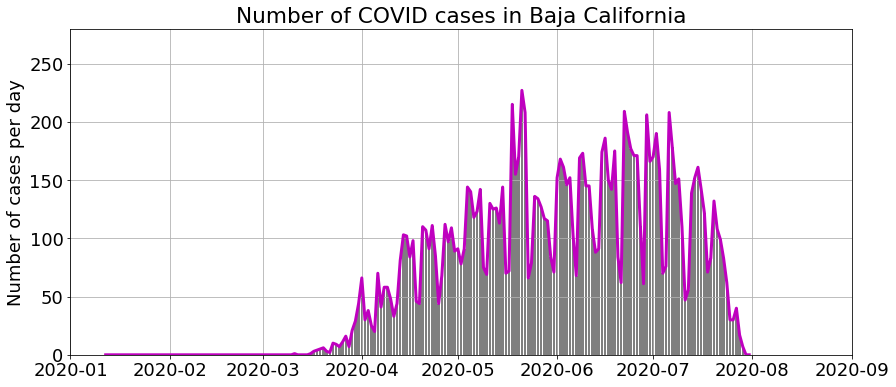

In [62]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Number of COVID cases in Baja California'
units = 'Number of cases per day'
ax.plot(num2date(time_final[1:]), cases_st_bc[1:], lw=3, color='m')
ax.bar(time_final[1:], cases_st_bc[1:], color='k', alpha=0.5)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 280)
ax.grid()
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax.set_xlim(fi1, fi2)
# plt.savefig('figuras/Figura_Estado_Baja_California.png', bbox_inches='tight')

In [70]:
temp_mat = np.loadtxt('datos_covid/temp_diaria_2020_tijuana.csv', delimiter=',')

In [71]:
temp_mean = temp_mat[:,3]
temp_min = temp_mat[:,4]
temp_max = temp_mat[:,5]

In [72]:
year = temp_mat[:,0]
month = temp_mat[:,1]
day = temp_mat[:,2]
time_final_temp = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_temp[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii])))

Text(0,0.5,'Temperature $^oC$')

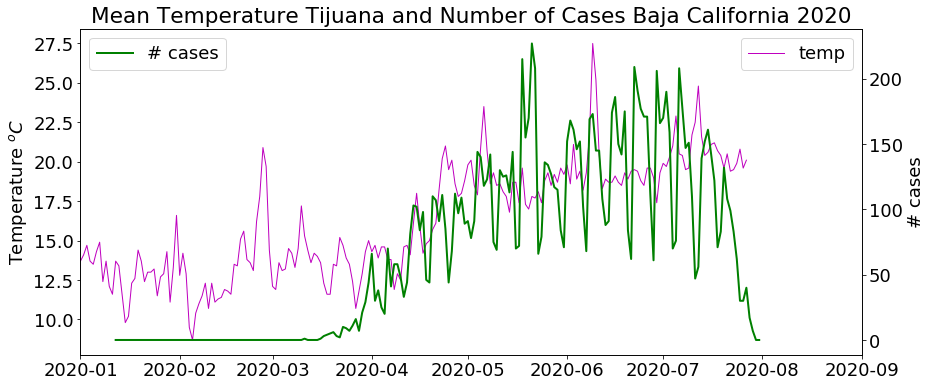

In [75]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Mean Temperature Tijuana and Number of Cases Baja California 2020'
ax1 = ax
ax1.plot(num2date(time_final_temp), temp_mean, lw=1, color='m', label='temp')
# ax1.plot(num2date(time_final_temp), temp_min, lw=1, color='r')
# ax1.plot(num2date(time_final_temp), temp_max, lw=1, color='k')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(num2date(time_final[1:]), cases_st_bc[1:], lw=2, color='g', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('# cases')
ax2.legend(loc=2)
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('Temperature $^oC$')
# plt.savefig('Figura_Estado_Baja_California.png', bbox_inches='tight')

Text(0,0.5,'Mean Temperature 2019')

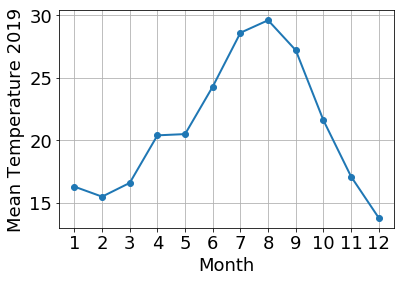

In [76]:
# Mean Temperature Baja California
temp_mean_2019 = np.asarray([16.3, 15.5, 16.6, 20.4, 20.5, 24.3, 28.6, 29.6, 27.2, 21.6, 17.1, 13.8])
month = np.arange(1, 13, 1)
fig, axs = plt.subplots(1,1)
axs.plot(month, temp_mean_2019, 'o-')
axs.set_xticks(month);
axs.grid()
axs.set_xlabel('Month')
axs.set_ylabel('Mean Temperature 2019')

In [77]:
temp_mat = np.loadtxt('datos_covid/temp_diaria_2019_tijuana.csv', delimiter=',')

In [78]:
year = temp_mat[:,0]
month = temp_mat[:,1]
day = temp_mat[:,2]
time_final_2019 = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_2019[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii])))

In [79]:
temp_mean_19 = temp_mat[:,3]
temp_min_19 = temp_mat[:,4]
temp_max_19 = temp_mat[:,5]
prec_19 = temp_mat[:, 6]

Text(0.5,0.98,'Tijuana Temperature 2019')

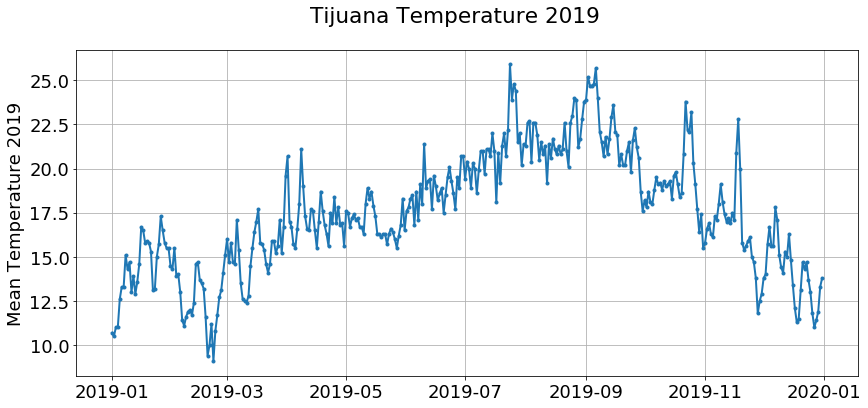

In [80]:
fig, axs = plt.subplots(1,1, figsize=(14, 6))
axs.plot(num2date(time_final_2019), temp_mean_19, '.-')
axs.grid()
#axs.set_xlabel('Month')
axs.set_ylabel('Mean Temperature 2019')
fig.suptitle('Tijuana Temperature 2019')

Text(0.5,0.98,'Tijuana rain 2019')

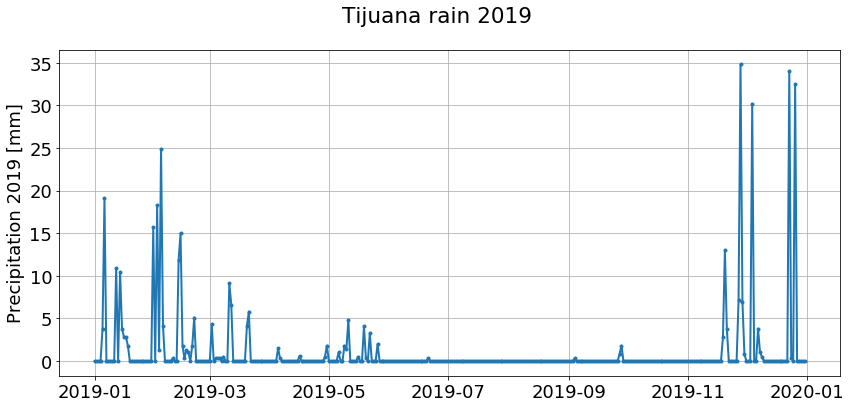

In [81]:
fig, axs = plt.subplots(1,1, figsize=(14, 6))
axs.plot(num2date(time_final_2019), prec_19, '.-')
axs.grid()
#axs.set_xlabel('Month')
axs.set_ylabel('Precipitation 2019 [mm]')
fig.suptitle('Tijuana rain 2019')

# If Covid existed in 2019? Do you think temperature and rain would have an impact in COVID-19?